In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
from skimage.data import imread
import os,cv2
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'train_images', 'test_images']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head(5)



,filename,food_type
0,1dbaa9de-dbb6-11e8-840e-fa00c4a9e605.jpg,apple_pie
1,1dbe160a-dbb6-11e8-8c22-fa00c4a9e605.jpg,apple_pie
2,1dbe51cc-dbb6-11e8-977b-fa00c4a9e605.jpg,apple_pie
3,1dbe8482-dbb6-11e8-8b6a-fa00c4a9e605.jpg,apple_pie
4,1dbeefb4-dbb6-11e8-9d47-fa00c4a9e605.jpg,apple_pie


In [5]:
test.head(5)

,id,filename,food_type
0,0,a2976db0-dbb4-11e8-ba1d-fa00c4a9e605.jpg,apple_pie
1,1,a297b4e6-dbb4-11e8-a4ae-fa00c4a9e605.jpg,apple_pie
2,2,a297c454-dbb4-11e8-a2a0-fa00c4a9e605.jpg,apple_pie
3,3,a297fb06-dbb4-11e8-81d4-fa00c4a9e605.jpg,apple_pie
4,4,a298234a-dbb4-11e8-85c6-fa00c4a9e605.jpg,apple_pie


In [6]:
train.describe()

,filename,food_type
count,75750,75750
unique,75750,101
top,2a5d449e-dbb6-11e8-844f-fa00c4a9e605.jpg,onion_rings
freq,1,750


In [7]:
train.food_type.unique()

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla',
       'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros',
       'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee',
       'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts',
       'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel',
       'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries',
       'french_onion_soup', 'french_toast', 'fried_calamari',
       'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi',
       'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon',
       'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog',
       'huevos_rancheros', 'hummus', 'ice_cr

In [8]:
np.array(train.food_type.unique()).shape

(101,)

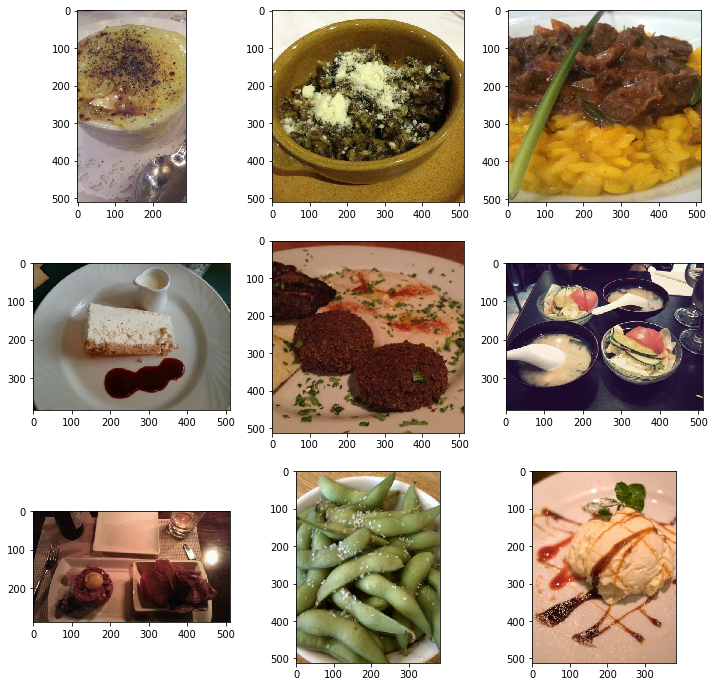

In [9]:
#for img in image['filename']:
#    print(img)    
image = train.sample(9)
fig, axes = plt.subplots(3, 3, figsize=(12,12))
for i, image_id in enumerate(image.filename):
    col = i % 3
    row = i // 3
    img = imread(f'../input/train_images/train_images/{image_id}')
    axes[row, col].axis('on')
    axes[row, col].imshow(img)
    

## Resize all the images

In [10]:
from tqdm import tqdm
train_dir = '../input/train_images/train_images'

images = []
train_types = []

train_files = [train_dir + '/' + filename for filename in os.listdir(train_dir)]
np.random.shuffle(train_files)
#print(car_files)
i = 0
for filename in tqdm(train_files):
    if filename.endswith('jpg'):
        try:
            images.append(cv2.resize(cv2.imread(filename), (224,224), interpolation=cv2.INTER_CUBIC))
            train_types.append(train[train_dir + '/' + train['filename'] == filename]['food_type'])
        except Exception as e:
            print(str(e))
    if i >= 5000:
            break
    i += 1


  7%|▋         | 4997/75750 [01:29<20:10, 58.44it/s]

In [11]:
images = np.array(images)


In [12]:
print(images.shape)

(5001, 224, 224, 3)


In [13]:
#train_types = np.array(train_types)
#train_types =train_types[:1000]
#print(len(train_types[1]))
#print(train_types[20][:1])
train_types_arr = np.concatenate(train_types)
#train_types_arr.reshape(train_types_arr.shape[0],1)
print(train_types_arr)


['edamame' 'ice_cream' 'escargots' ... 'beignets' 'beignets' 'omelette']


## Show resize images

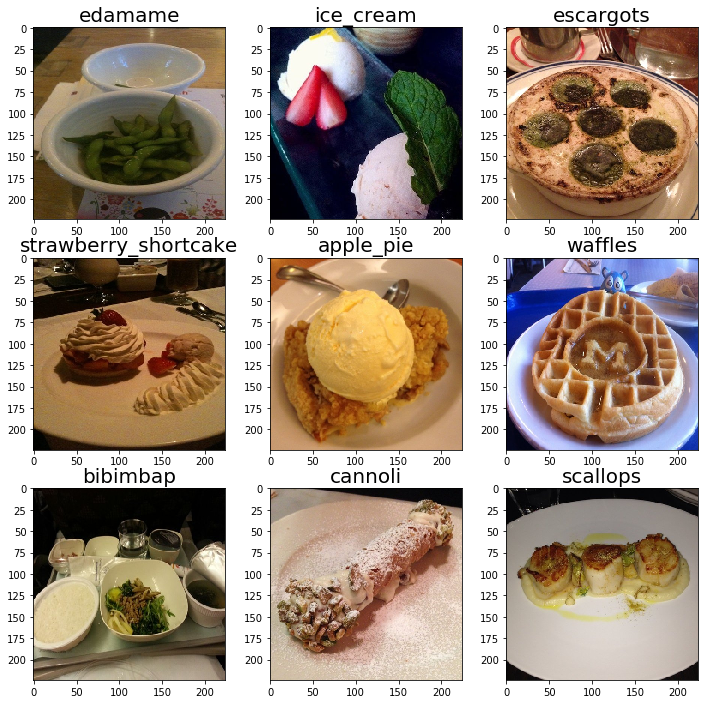

In [14]:
_, ax = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    for j in range(3):
      ax[i,j].imshow(cv2.cvtColor(images[(i*200)+j], cv2.COLOR_BGR2RGB))
      ax[i,j].axis('on')
      #ax[i,j].set_title(train_types_arr[(i*200)+j], size = 20)
      ax[i,j].set_title(train_types_arr[(i*200)+j], size = 20)

In [15]:

print(train_types_arr.shape)

(5001,)


## One-hot processing the food_type
### Turn food_type from one column to 101 columns with 0 and 1

## Train_test_split stratify by food_type

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, train_types_arr, test_size=0.2, random_state=1, stratify=train_types_arr)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.1, random_state=1, stratify=y_val)

In [17]:
#plt.hist(train_types_arr,101)

In [18]:
print(x_train.shape)

(4000, 224, 224, 3)


In [19]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4000,)
(900,)
(101,)


In [20]:
print(y_val)

['greek_salad' 'chocolate_mousse' 'shrimp_and_grits' 'huevos_rancheros'
 'ravioli' 'lobster_bisque' 'sashimi' 'mussels' 'french_onion_soup'
 'mussels' 'tiramisu' 'club_sandwich' 'pancakes' 'peking_duck'
 'carrot_cake' 'fried_rice' 'sushi' 'cup_cakes' 'fish_and_chips'
 'macarons' 'chicken_wings' 'foie_gras' 'lobster_bisque' 'croque_madame'
 'french_toast' 'spring_rolls' 'pho' 'lobster_roll_sandwich' 'guacamole'
 'french_onion_soup' 'spaghetti_bolognese' 'paella' 'risotto' 'macarons'
 'chocolate_mousse' 'nachos' 'fish_and_chips' 'escargots' 'fish_and_chips'
 'ramen' 'hamburger' 'prime_rib' 'foie_gras' 'ice_cream' 'chocolate_cake'
 'beet_salad' 'macarons' 'cannoli' 'lobster_bisque' 'beet_salad'
 'bibimbap' 'pulled_pork_sandwich' 'shrimp_and_grits' 'red_velvet_cake'
 'hummus' 'shrimp_and_grits' 'omelette' 'lasagna' 'carrot_cake'
 'panna_cotta' 'escargots' 'donuts' 'seaweed_salad' 'risotto'
 'chocolate_mousse' 'eggs_benedict' 'steak' 'samosa' 'cup_cakes' 'edamame'
 'mussels' 'garlic_bread' 

In [21]:

y_train_dummy = pd.get_dummies(y_train)
y_val_dummy = pd.get_dummies(y_val)
y_test_dummy = pd.get_dummies(y_test)
print(y_train_dummy.head())
print(y_val_dummy.head())
print(y_test_dummy.head())

   apple_pie  baby_back_ribs  baklava   ...     tiramisu  tuna_tartare  waffles
0          0               0        0   ...            0             0        0
1          0               0        0   ...            1             0        0
2          0               0        0   ...            0             0        0
3          0               0        0   ...            1             0        0
4          0               0        0   ...            0             0        0

[5 rows x 101 columns]
   apple_pie  baby_back_ribs  baklava   ...     tiramisu  tuna_tartare  waffles
0          0               0        0   ...            0             0        0
1          0               0        0   ...            0             0        0
2          0               0        0   ...            0             0        0
3          0               0        0   ...            0             0        0
4          0               0        0   ...            0             0        0

[5 rows x 101 c

In [22]:
y_train_dummy = np.array(y_train_dummy)
y_val_dummy = np.array(y_val_dummy)
#print(y_val_dummy[0].shape)
y_test_dummy = np.array(y_test_dummy)



print(y_train_dummy[0].shape)
print(y_val_dummy[0].shape)
print(y_test_dummy[0].shape)

(101,)
(101,)
(101,)


  7%|▋         | 4997/75750 [01:40<20:10, 58.44it/s]

## Then gonna train the model with x and one-hot y

### First, data generator

In [23]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [24]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.125,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.125,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False, # randomly flip images
    rescale=1./255,
    fill_mode='nearest')
datagen.fit(x_train)
generator = datagen.flow(x_train, y_train_dummy, batch_size=32)
val_generator = datagen.flow(x_val, y_val_dummy, batch_size=32)

## Build Up the Model

In [25]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K
from keras.optimizers import SGD, RMSprop, Adam

In [26]:
K.clear_session()

base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x = base_model.output
x = GlobalAveragePooling2D()(x)
# # x = Flatten()(x)
x = Dense(4096)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(.5)(x)
predictions = Dense(101, activation='softmax')(x)

# x = base_model.output
# x = AveragePooling2D((8, 8), strides=(8, 8), name='avg_pool')(x)
# x = Flatten(name='flatten')(x)
# predictions = Dense(101, activation='softmax', name='predictions')(x)

model = Model(input=base_model.input, output=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

#model.summary()

87916544/87910968 [==============================] - 2s 0us/step


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [31]:
model.fit_generator(generator,
                    validation_data=val_generator,
                    nb_val_samples=100,
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=125, epochs=10, validation_steps=100)`
  """


Epoch 1/10
125/125 [==============================] - 96s 768ms/step - loss: 2.9326 - acc: 0.4110 - val_loss: 12.0664 - val_acc: 0.0883
Epoch 2/10
125/125 [==============================] - 92s 733ms/step - loss: 2.9376 - acc: 0.4078 - val_loss: 10.8041 - val_acc: 0.1117
Epoch 3/10
125/125 [==============================] - 92s 735ms/step - loss: 2.8048 - acc: 0.4288 - val_loss: 10.7279 - val_acc: 0.1216
Epoch 4/10
125/125 [==============================] - 91s 724ms/step - loss: 2.5839 - acc: 0.4485 - val_loss: 10.5335 - val_acc: 0.1159
Epoch 5/10
125/125 [==============================] - 92s 733ms/step - loss: 2.5300 - acc: 0.4525 - val_loss: 10.4987 - val_acc: 0.1274
Epoch 6/10
125/125 [==============================] - 91s 729ms/step - loss: 2.4489 - acc: 0.4785 - val_loss: 10.6809 - val_acc: 0.1078
Epoch 7/10
125/125 [==============================] - 91s 731ms/step - loss: 2.3824 - acc: 0.4860 - val_loss: 11.1331 - val_acc: 0.1094
Epoch 8/10
125/125 [============================

In [32]:
model.save('food_try1.h5')